<a href="https://colab.research.google.com/github/SummerProjectTEAM-10/sample/blob/SRUTHI/Copy_of_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### **LOADING DATASET**

In [ ]:
Diabetes_dataset=pd.read_csv('/content/pima-indians-diabetes.csv')

### **DESCRIPTIVE STATISTICS**

In [ ]:
Diabetes_dataset.head(3)
#Diabetes_dataset.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
Diabetes_dataset.shape

(768, 9)

In our dataset we have 768 rows/records and 9 columns/features

In [ ]:
Diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
Diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above summary we can see some features have zero as minimum value.
For features like Glucose, BloodPressure, SkinThickness, Insulin, BMI we cannot have zero in real time. So it represents missing data.

### **CORRELATION MATRIX**

Correlation describes the strength and direction of the linear association between two quantitative variables.
It ranges from -1 to +1, Positive value indicate positive association and negative value indicate negative association.

In [ ]:
Diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


From the correlation matrix we found that Glucose, BMI, Age, Pregnancies, DiabetesPedigreeFunction are the top 5 features that are associated to the outcome.

### **DATA VISUALIZATION**

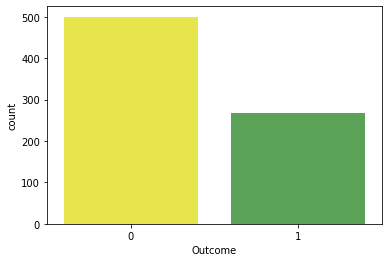

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
sns.countplot(x ='Outcome', data = Diabetes_dataset, palette='Set1_r')
plt.show()
Diabetes_dataset['Outcome'].value_counts()

From the above count plot visualization we see that the dataset contain 500 non-diabetic patients and 268 diabetic patients.

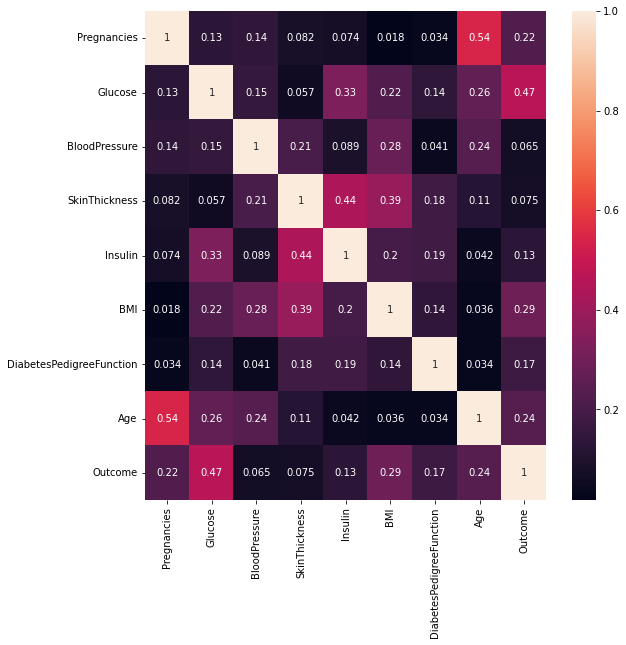

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(Diabetes_dataset.corr()), annot=True);

### **DATA CLEANING**

In [ ]:
Diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### **MODEL BUILDING**

In [ ]:
Features_Columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
#Features_Columns = ['Pregnancies','Glucose','BloodPressure','BMI','Age']
X = Diabetes_dataset[Features_Columns]  # INDEPENDENT VARIABLES
y = Diabetes_dataset["Outcome"]         # DEPENDENT VARIABLE


### **SPLITTING DATASET INTO TRAINING DATA AND TESTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print("X_train.shape --> ",X_train.shape)
print("y_train.shape --> ",y_train.shape)
print("X_test.shape  --> ",X_test.shape)
print("y_test.shape  --> ",y_test.shape)

X_train.shape -->  (537, 8)
y_train.shape -->  (537,)
X_test.shape  -->  (231, 8)
y_test.shape  -->  (231,)


### **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
Logmodel = LogisticRegression()
Logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Prediction on the test data set
y_prediction = Logmodel.predict(X_test)

accuracy1 = Logmodel.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1 * 100, "%")

accuracy2 = Logmodel.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2 * 100, "%")

Accuracy of train data =  77.28119180633148 %
Accuracy of test data =  78.35497835497836 %


### **SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC
#SvcModel = SVC()
SvcModel = SVC(kernel = 'linear', random_state = 42)
SvcModel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_prediction_SVC = SvcModel.predict(X_test)

accuracy1SVC = SvcModel.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1SVC * 100, "%")

accuracy2SVC = SvcModel.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2 * 100, "%")


Accuracy of train data =  78.02607076350093 %
Accuracy of test data =  78.35497835497836 %


### **CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
print ("Confusion Matrix for LOGISTIC REGRESSION: \n", cm)

Confusion Matrix for LOGISTIC REGRESSION: 
 [[132  14]
 [ 36  49]]


In [ ]:
 cm = confusion_matrix(y_test, y_prediction_SVC)
print ("Confusion Matrix for SVM: \n", cm)

Confusion Matrix for SVM: 
 [[133  13]
 [ 35  50]]


### **PRE-PROCESSING**

In [ ]:
Diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
def median_target(var):   
    temp = Diabetes_dataset[Diabetes_dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
columns = Diabetes_dataset.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    Diabetes_dataset.loc[(Diabetes_dataset['Outcome'] == 0 ) & (Diabetes_dataset[i].isnull()), i] = median_target(i)[i][0]
    Diabetes_dataset.loc[(Diabetes_dataset['Outcome'] == 1 ) & (Diabetes_dataset[i].isnull()), i] = median_target(i)[i][1]

### **LOGISTIC REGRESSION WITH PRE-PROCESSED DATA**

In [ ]:

Features_Columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
#Features_Columns = ['Pregnancies','Glucose','BloodPressure','BMI','Age']
X = Diabetes_dataset[Features_Columns]  # INDEPENDENT VARIABLES
y = Diabetes_dataset["Outcome"]         # DEPENDENT VARIABLE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.linear_model import LogisticRegression
Logmodel = LogisticRegression()
Logmodel.fit(X_train, y_train)

y_prediction = Logmodel.predict(X_test)
print("PRE-PROCESSED DATA: ")
accuracy1 = Logmodel.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1 * 100, "%")

accuracy2 = Logmodel.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2 * 100, "%")

PRE-PROCESSED DATA: 
Accuracy of train data =  76.90875232774674 %
Accuracy of test data =  80.95238095238095 %


### **SVM WITH PRE-PROCESSED DATA**

In [ ]:

Features_Columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
#Features_Columns = ['Pregnancies','Glucose','BloodPressure','BMI','Age']
X = Diabetes_dataset[Features_Columns]  # INDEPENDENT VARIABLES
y = Diabetes_dataset["Outcome"]         # DEPENDENT VARIABLE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.svm import SVC
SvcModel = SVC()
#SvcModel = SVC(kernel = 'linear', random_state = 42)
SvcModel.fit(X_train, y_train)

y_prediction_SVC = SvcModel.predict(X_test)
print("PRE-PROCESSED DATA: ")
accuracySVC = SvcModel.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1SVC * 100, "%")

accuracy2SVC = SvcModel.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2 * 100, "%")


#print ("Accuracy : ", accuracy_score(y_test, y_prediction_SVC)*100,"%")


PRE-PROCESSED DATA: 
Accuracy of train data =  78.02607076350093 %
Accuracy of test data =  80.95238095238095 %


### **SELECTING SPECIFIC FEATURE**

In [ ]:
#Features_Columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
Features_Columns = ['Pregnancies','Glucose','BloodPressure','BMI','Age']
X = Diabetes_dataset[Features_Columns]  # INDEPENDENT VARIABLES
y = Diabetes_dataset["Outcome"]         # DEPENDENT VARIABLE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.linear_model import LogisticRegression
Logmodel = LogisticRegression()
Logmodel.fit(X_train, y_train)

y_prediction = Logmodel.predict(X_test)

accuracy1 = Logmodel.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1 * 100, "%")

accuracy2 = Logmodel.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2 * 100, "%")
#from sklearn.metrics import accuracy_score
#print ("Accuracy : ", accuracy_score(y_test, y_prediction)*100,"%")

Accuracy of train data =  75.41899441340783 %
Accuracy of test data =  78.78787878787878 %


In [ ]:

#Features_Columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
Features_Columns = ['Pregnancies','Glucose','BloodPressure','BMI','Age']
X = Diabetes_dataset[Features_Columns]  # INDEPENDENT VARIABLES
y = Diabetes_dataset["Outcome"]         # DEPENDENT VARIABLE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.svm import SVC
SvcModel = SVC()
#SvcModel = SVC(kernel = 'linear', random_state = 42)
SvcModel.fit(X_train, y_train)

y_prediction_SVC = SvcModel.predict(X_test)

accuracy1SVC = SvcModel.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1SVC * 100, "%")

accuracy2SVC = SvcModel.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2 * 100, "%")

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_prediction_SVC)*100,"%")


Accuracy of train data =  75.97765363128491 %
Accuracy of test data =  80.95238095238095 %
Accuracy :  79.22077922077922 %
